In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('fake_bills.csv')

In [ ]:
print(dataset)

     is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
0            True;171.81;104.86;104.95;4.52;2.89;112.83                      
1            True;171.46;103.36;103.66;3.77;2.99;113.09                      
2              True;172.69;104.48;103.5;4.4;2.94;113.16                      
3            True;171.36;103.91;103.94;3.62;3.01;113.51                      
4            True;171.73;104.28;103.46;4.04;3.48;112.54                      
...                                                 ...                      
1495        False;171.75;104.38;104.17;4.42;3.09;111.28                      
1496        False;172.19;104.63;104.44;5.27;3.37;110.97                      
1497         False;171.8;104.01;104.12;5.51;3.36;111.95                      
1498        False;172.06;104.28;104.06;5.17;3.46;112.25                      
1499        False;171.47;104.15;103.82;4.63;3.37;112.07                      

[1500 rows x 1 columns]


In [ ]:
dataset=pd.read_csv('fake_bills.csv',delimiter=';')

In [ ]:
print(dataset)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

In [ ]:
x = dataset.drop(columns='is_genuine')
y = dataset['is_genuine']


In [ ]:
print(x)

      diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95        4.52       2.89  112.83
1       171.46       103.36        103.66        3.77       2.99  113.09
2       172.69       104.48        103.50        4.40       2.94  113.16
3       171.36       103.91        103.94        3.62       3.01  113.51
4       171.73       104.28        103.46        4.04       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1495    171.75       104.38        104.17        4.42       3.09  111.28
1496    172.19       104.63        104.44        5.27       3.37  110.97
1497    171.80       104.01        104.12        5.51       3.36  111.95
1498    172.06       104.28        104.06        5.17       3.46  112.25
1499    171.47       104.15        103.82        4.63       3.37  112.07

[1500 rows x 6 columns]


In [ ]:
print(y)

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train)


      diagonal  height_left  height_right  margin_low  margin_up  length
519     172.13       103.76        103.33        4.37       3.48  113.34
1032    172.08       104.22        104.41        4.51       3.30  111.40
557     171.24       103.81        103.74        4.69       3.29  113.53
642     171.85       103.90        103.74        4.13       3.07  113.15
651     171.62       103.49        103.58        3.95       3.00  113.10
...        ...          ...           ...         ...        ...     ...
763     172.41       104.43        103.65        3.97       3.35  113.71
835     172.15       104.08        104.10        4.34       2.78  113.33
1216    171.93       104.09        104.51        4.87       3.58  111.63
559     172.12       103.59        103.77        3.74       3.21  113.32
684     172.13       103.76        103.85        3.65       3.24  112.92

[1050 rows x 6 columns]


In [ ]:
print(y_train)

519      True
1032    False
557      True
642      True
651      True
        ...  
763      True
835      True
1216    False
559      True
684      True
Name: is_genuine, Length: 1050, dtype: bool


In [ ]:
y_test=y_test.astype(int)
y_train=y_train.astype(int)

In [ ]:
print(y_test)

471     1
9       1
1499    0
54      1
1411    0
       ..
1331    0
1202    0
1323    0
1164    0
938     1
Name: is_genuine, Length: 450, dtype: int64


In [ ]:
total_nan = np.isnan(x_train).sum()
print(f"Total NaN values: {total_nan}")

Total NaN values: diagonal         0
height_left      0
height_right     0
margin_low      26
margin_up        0
length           0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


imputer.fit(x_train)

X_train_imputed = imputer.transform(x_train)
X_test_imputed = imputer.transform(x_test)

total_nan_train = np.isnan(X_train_imputed).sum()
total_nan_test = np.isnan(X_test_imputed).sum()

print(f"Total NaN values in X_train after imputation: {total_nan_train}")
print(f"Total NaN values in X_test after imputation: {total_nan_test}")



Total NaN values in X_train after imputation: 0
Total NaN values in X_test after imputation: 0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
regresser=LogisticRegression()
regresser.fit(X_train_imputed,y_train)

LogisticRegression()

In [ ]:
y_pred = regresser.predict(X_test_imputed)


In [ ]:
ans=regresser.predict([[171,104,104,4,2,112]])

In [ ]:
print(ans)

[ True]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9955555555555555


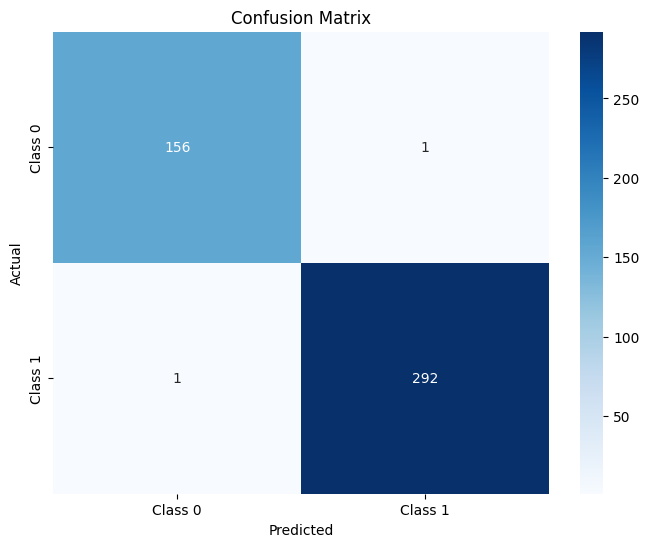

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

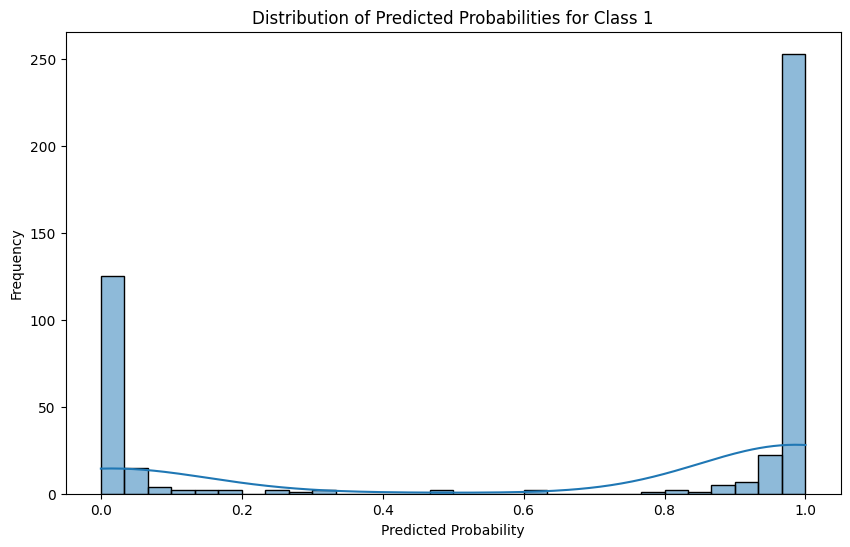

In [ ]:
y_proba = regresser.predict_proba(X_test_imputed)

plt.figure(figsize=(10, 6))
sns.histplot(y_proba[:, 1], bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities for Class 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
